In [25]:
import os

from dataset_splitter import split_dataset 
from preprocessing import \
        iterator_from_directory, \
        write_images_tfrecord, \
        images_dataset_from_tfrecord
from extract_features import \
        load_model as load_backbone, \
        prepare_dataset_for_inference, \
        write_featuremaps_to_tfrecord, \
        featuremaps_dataset_from_tfrecord
from mlutils import \
        plot_augmented_images_dataset_samples

In [2]:
dataset_dir = "/home/duo/datasets/desafio/"
build_dir = "/home/duo/sm-embedder/build"
dataset_splits_dir = os.path.join(build_dir, "datasets")
input_images_target_size = (300, 300)
input_images_target_shape= (300, 300, 3)

# Create base directories for artefacts if they don't exist
if not os.path.isdir(build_dir):
    os.makedirs(build_dir)
if not os.path.isdir(dataset_splits_dir):
    os.makedirs(dataset_splits_dir)

In [4]:
# Splits the original dataset into 3 subdirectories for training, validation
# and testing, preserving the original dataset intact. 
split_dataset(dataset_dir, dataset_splits_dir, (.8, .1, .1), verbose=True)

/home/duo/datasets/desafio/7896288960746_1611339210.8924847/6_1611339152.7685578.jpg
/home/duo/sm-embedder/build/datasets/train/7896288960746_1611339210.8924847/6_1611339152.7685578.jpg
/home/duo/datasets/desafio/7896288960746_1611339210.8924847/6_1611339167.2522404.jpg
/home/duo/sm-embedder/build/datasets/train/7896288960746_1611339210.8924847/6_1611339167.2522404.jpg
/home/duo/datasets/desafio/7896288960746_1611339210.8924847/5_1611339156.9817195.jpg
/home/duo/sm-embedder/build/datasets/train/7896288960746_1611339210.8924847/5_1611339156.9817195.jpg
/home/duo/datasets/desafio/7896288960746_1611339210.8924847/3_1611339194.0009875.jpg
/home/duo/sm-embedder/build/datasets/train/7896288960746_1611339210.8924847/3_1611339194.0009875.jpg
/home/duo/datasets/desafio/7896288960746_1611339210.8924847/8_1611339207.3402.jpg
/home/duo/sm-embedder/build/datasets/train/7896288960746_1611339210.8924847/8_1611339207.3402.jpg
/home/duo/datasets/desafio/7896288960746_1611339210.8924847/2_1611339167.227

/home/duo/datasets/desafio/7896102517200_1612010039.002708/11_1612010004.2824185.jpg
/home/duo/sm-embedder/build/datasets/test/7896102517200_1612010039.002708/11_1612010004.2824185.jpg
/home/duo/datasets/desafio/7896102517200_1612010039.002708/6_1612010027.3605032.jpg
/home/duo/sm-embedder/build/datasets/test/7896102517200_1612010039.002708/6_1612010027.3605032.jpg
/home/duo/datasets/desafio/7891000070444_1611862467.2242649/10_1611862409.074425.jpg
/home/duo/sm-embedder/build/datasets/train/7891000070444_1611862467.2242649/10_1611862409.074425.jpg
/home/duo/datasets/desafio/7891000070444_1611862467.2242649/8_1611862429.4902759.jpg
/home/duo/sm-embedder/build/datasets/train/7891000070444_1611862467.2242649/8_1611862429.4902759.jpg
/home/duo/datasets/desafio/7891000070444_1611862467.2242649/4_1611862434.6389198.jpg
/home/duo/sm-embedder/build/datasets/train/7891000070444_1611862467.2242649/4_1611862434.6389198.jpg
/home/duo/datasets/desafio/7891000070444_1611862467.2242649/3_1611862445.6

/home/duo/datasets/desafio/7891098010568_1612006995.509799/5_1612006951.0194695.jpg
/home/duo/sm-embedder/build/datasets/train/7891098010568_1612006995.509799/5_1612006951.0194695.jpg
/home/duo/datasets/desafio/7891098010568_1612006995.509799/11_1612006962.1061392.jpg
/home/duo/sm-embedder/build/datasets/train/7891098010568_1612006995.509799/11_1612006962.1061392.jpg
/home/duo/datasets/desafio/7891098010568_1612006995.509799/11_1612006956.968298.jpg
/home/duo/sm-embedder/build/datasets/train/7891098010568_1612006995.509799/11_1612006956.968298.jpg
/home/duo/datasets/desafio/7891098010568_1612006995.509799/10_1612006989.146622.jpg
/home/duo/sm-embedder/build/datasets/train/7891098010568_1612006995.509799/10_1612006989.146622.jpg
/home/duo/datasets/desafio/7891098010568_1612006995.509799/4_1612006934.9993234.jpg
/home/duo/sm-embedder/build/datasets/train/7891098010568_1612006995.509799/4_1612006934.9993234.jpg
/home/duo/datasets/desafio/7891098010568_1612006995.509799/7_1612006956.943992

/home/duo/datasets/desafio/7500435154284_1610984294.017117/0_1610984260.9463983.jpg
/home/duo/sm-embedder/build/datasets/train/7500435154284_1610984294.017117/0_1610984260.9463983.jpg
/home/duo/datasets/desafio/7500435154284_1610984294.017117/1_1610984282.3604805.jpg
/home/duo/sm-embedder/build/datasets/train/7500435154284_1610984294.017117/1_1610984282.3604805.jpg
/home/duo/datasets/desafio/7500435154284_1610984294.017117/11_1610984282.422096.jpg
/home/duo/sm-embedder/build/datasets/train/7500435154284_1610984294.017117/11_1610984282.422096.jpg
/home/duo/datasets/desafio/7500435154284_1610984294.017117/5_1610984266.283762.jpg
/home/duo/sm-embedder/build/datasets/train/7500435154284_1610984294.017117/5_1610984266.283762.jpg
/home/duo/datasets/desafio/7500435154284_1610984294.017117/6_1610984253.672318.jpg
/home/duo/sm-embedder/build/datasets/train/7500435154284_1610984294.017117/6_1610984253.672318.jpg
/home/duo/datasets/desafio/7500435154284_1610984294.017117/0_1610984287.4659064.jpg


/home/duo/datasets/desafio/7898024395416_1610552337.8351424/8_1610552330.9152515.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395416_1610552337.8351424/8_1610552330.9152515.jpg
/home/duo/datasets/desafio/7898024395416_1610552337.8351424/5_1610552294.4795654.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395416_1610552337.8351424/5_1610552294.4795654.jpg
/home/duo/datasets/desafio/7898024395416_1610552337.8351424/9_1610552278.7006507.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395416_1610552337.8351424/9_1610552278.7006507.jpg
/home/duo/datasets/desafio/7898024395416_1610552337.8351424/0_1610552325.973224.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395416_1610552337.8351424/0_1610552325.973224.jpg
/home/duo/datasets/desafio/7898024395416_1610552337.8351424/5_1610552320.867023.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395416_1610552337.8351424/5_1610552320.867023.jpg
/home/duo/datasets/desafio/7898024395416_1610552337.8351424/6_1610552320.8

/home/duo/datasets/desafio/7896005802892_1612009525.2566464/5_1612009474.7987068.jpg
/home/duo/sm-embedder/build/datasets/train/7896005802892_1612009525.2566464/5_1612009474.7987068.jpg
/home/duo/datasets/desafio/7896005802892_1612009525.2566464/9_1612009523.9063785.jpg
/home/duo/sm-embedder/build/datasets/train/7896005802892_1612009525.2566464/9_1612009523.9063785.jpg
/home/duo/datasets/desafio/7896005802892_1612009525.2566464/6_1612009474.8046143.jpg
/home/duo/sm-embedder/build/datasets/train/7896005802892_1612009525.2566464/6_1612009474.8046143.jpg
/home/duo/datasets/desafio/7896005802892_1612009525.2566464/6_1612009504.5888128.jpg
/home/duo/sm-embedder/build/datasets/train/7896005802892_1612009525.2566464/6_1612009504.5888128.jpg
/home/duo/datasets/desafio/7896005802892_1612009525.2566464/9_1612009484.2957346.jpg
/home/duo/sm-embedder/build/datasets/train/7896005802892_1612009525.2566464/9_1612009484.2957346.jpg
/home/duo/datasets/desafio/7896005802892_1612009525.2566464/6_16120094

/home/duo/datasets/desafio/7898024395850_1610552452.290709/9_1610552409.4657614.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395850_1610552452.290709/9_1610552409.4657614.jpg
/home/duo/datasets/desafio/7898024395850_1610552452.290709/4_1610552449.1973033.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395850_1610552452.290709/4_1610552449.1973033.jpg
/home/duo/datasets/desafio/7898024395850_1610552452.290709/0_1610552439.0357864.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395850_1610552452.290709/0_1610552439.0357864.jpg
/home/duo/datasets/desafio/7898024395850_1610552452.290709/1_1610552449.1858509.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395850_1610552452.290709/1_1610552449.1858509.jpg
/home/duo/datasets/desafio/7898024395850_1610552452.290709/3_1610552429.960119.jpg
/home/duo/sm-embedder/build/datasets/train/7898024395850_1610552452.290709/3_1610552429.960119.jpg
/home/duo/datasets/desafio/7898024395850_1610552452.290709/6_1610552420.3223262.jp

/home/duo/datasets/desafio/7894650013281_1611766633.4101174/2_1611766582.0006223.jpg
/home/duo/sm-embedder/build/datasets/test/7894650013281_1611766633.4101174/2_1611766582.0006223.jpg
/home/duo/datasets/desafio/7894650013281_1611766633.4101174/7_1611766587.0196886.jpg
/home/duo/sm-embedder/build/datasets/test/7894650013281_1611766633.4101174/7_1611766587.0196886.jpg
/home/duo/datasets/desafio/7894650013281_1611766633.4101174/4_1611766602.414253.jpg
/home/duo/sm-embedder/build/datasets/test/7894650013281_1611766633.4101174/4_1611766602.414253.jpg
/home/duo/datasets/desafio/7891000006689_1611680733.1381156/3_1611680704.2531672.jpg
/home/duo/sm-embedder/build/datasets/train/7891000006689_1611680733.1381156/3_1611680704.2531672.jpg
/home/duo/datasets/desafio/7891000006689_1611680733.1381156/8_1611680695.3537085.jpg
/home/duo/sm-embedder/build/datasets/train/7891000006689_1611680733.1381156/8_1611680695.3537085.jpg
/home/duo/datasets/desafio/7891000006689_1611680733.1381156/8_1611680718.41

/home/duo/datasets/desafio/7891098002044_1612006925.5274303/8_1612006887.107897.jpg
/home/duo/sm-embedder/build/datasets/train/7891098002044_1612006925.5274303/8_1612006887.107897.jpg
/home/duo/datasets/desafio/7891098002044_1612006925.5274303/1_1612006908.1427305.jpg
/home/duo/sm-embedder/build/datasets/train/7891098002044_1612006925.5274303/1_1612006908.1427305.jpg
/home/duo/datasets/desafio/7891098002044_1612006925.5274303/8_1612006913.31956.jpg
/home/duo/sm-embedder/build/datasets/train/7891098002044_1612006925.5274303/8_1612006913.31956.jpg
/home/duo/datasets/desafio/7891098002044_1612006925.5274303/3_1612006908.1542778.jpg
/home/duo/sm-embedder/build/datasets/train/7891098002044_1612006925.5274303/3_1612006908.1542778.jpg
/home/duo/datasets/desafio/7891098002044_1612006925.5274303/4_1612006881.815815.jpg
/home/duo/sm-embedder/build/datasets/train/7891098002044_1612006925.5274303/4_1612006881.815815.jpg
/home/duo/datasets/desafio/7891098002044_1612006925.5274303/2_1612006913.28404

/home/duo/datasets/desafio/7891098038371_1612006784.5796192/1_1612006735.5460336.jpg
/home/duo/sm-embedder/build/datasets/train/7891098038371_1612006784.5796192/1_1612006735.5460336.jpg
/home/duo/datasets/desafio/7891098038371_1612006784.5796192/1_1612006775.1279697.jpg
/home/duo/sm-embedder/build/datasets/train/7891098038371_1612006784.5796192/1_1612006775.1279697.jpg
/home/duo/datasets/desafio/7891098038371_1612006784.5796192/4_1612006779.8105245.jpg
/home/duo/sm-embedder/build/datasets/train/7891098038371_1612006784.5796192/4_1612006779.8105245.jpg
/home/duo/datasets/desafio/7891098038371_1612006784.5796192/7_1612006715.4787886.jpg
/home/duo/sm-embedder/build/datasets/train/7891098038371_1612006784.5796192/7_1612006715.4787886.jpg
/home/duo/datasets/desafio/7891098038371_1612006784.5796192/2_1612006748.0385816.jpg
/home/duo/sm-embedder/build/datasets/train/7891098038371_1612006784.5796192/2_1612006748.0385816.jpg
/home/duo/datasets/desafio/7891098038371_1612006784.5796192/13_1612006

/home/duo/datasets/desafio/7898905100023_1611677073.7563233/1_1611677047.6108425.jpg
/home/duo/sm-embedder/build/datasets/train/7898905100023_1611677073.7563233/1_1611677047.6108425.jpg
/home/duo/datasets/desafio/7898905100023_1611677073.7563233/5_1611677042.2029936.jpg
/home/duo/sm-embedder/build/datasets/train/7898905100023_1611677073.7563233/5_1611677042.2029936.jpg
/home/duo/datasets/desafio/7898905100023_1611677073.7563233/7_1611677037.4182074.jpg
/home/duo/sm-embedder/build/datasets/train/7898905100023_1611677073.7563233/7_1611677037.4182074.jpg
/home/duo/datasets/desafio/7898905100023_1611677073.7563233/12_1611677037.4407716.jpg
/home/duo/sm-embedder/build/datasets/train/7898905100023_1611677073.7563233/12_1611677037.4407716.jpg
/home/duo/datasets/desafio/7898905100023_1611677073.7563233/5_1611677013.7420733.jpg
/home/duo/sm-embedder/build/datasets/train/7898905100023_1611677073.7563233/5_1611677013.7420733.jpg
/home/duo/datasets/desafio/7898905100023_1611677073.7563233/7_161167

In [5]:
# This first iterator yields augmented images that will be used for training.
train_it = iterator_from_directory(
        input_dir=os.path.join(dataset_splits_dir, 'train'),
        batch_size=64,
        augment=True,
        target_size=input_images_target_size)

# Writes a tfrecord containing the augmented images and their labels.
# I'm using tfrecord for performance and to facilitate dataset manipulation
# in the next steps.
write_images_tfrecord(
        record_fname=os.path.join(build_dir, "train.tfrecord"), 
        iterator=train_it,
        n_batches=200)

Found 2054 images belonging to 20 classes.

:: Processing batch #0...
  |_ #64 images processed.
:: Processing batch #1...
  |_ #64 images processed.
:: Processing batch #2...
  |_ #64 images processed.
:: Processing batch #3...
  |_ #64 images processed.
:: Processing batch #4...
  |_ #64 images processed.
:: Processing batch #5...
  |_ #64 images processed.
:: Processing batch #6...
  |_ #64 images processed.
:: Processing batch #7...
  |_ #64 images processed.
:: Processing batch #8...
  |_ #64 images processed.
:: Processing batch #9...
  |_ #64 images processed.
:: Processing batch #10...
  |_ #64 images processed.
:: Processing batch #11...
  |_ #64 images processed.
:: Processing batch #12...
  |_ #64 images processed.
:: Processing batch #13...
  |_ #64 images processed.
:: Processing batch #14...
  |_ #64 images processed.
:: Processing batch #15...
  |_ #64 images processed.
:: Processing batch #16...
  |_ #64 images processed.
:: Processing batch #17...
  |_ #64 images proce

  |_ #64 images processed.
:: Processing batch #151...
  |_ #64 images processed.
:: Processing batch #152...
  |_ #64 images processed.
:: Processing batch #153...
  |_ #64 images processed.
:: Processing batch #154...
  |_ #64 images processed.
:: Processing batch #155...
  |_ #64 images processed.
:: Processing batch #156...
  |_ #64 images processed.
:: Processing batch #157...
  |_ #64 images processed.
:: Processing batch #158...
  |_ #64 images processed.
:: Processing batch #159...
  |_ #64 images processed.
:: Processing batch #160...
  |_ #64 images processed.
:: Processing batch #161...
  |_ #64 images processed.
:: Processing batch #162...
  |_ #64 images processed.
:: Processing batch #163...
  |_ #64 images processed.
:: Processing batch #164...
  |_ #6 images processed.
:: Processing batch #165...
  |_ #64 images processed.
:: Processing batch #166...
  |_ #64 images processed.
:: Processing batch #167...
  |_ #64 images processed.
:: Processing batch #168...
  |_ #64 im

In [6]:
# Saving hashes from directory names to a file, to later recover class names 
with open(os.path.join(build_dir, 'labels.tsv'), 'w') as f:
    f.write('\n'.join(train_it.class_indices.keys()))

In [7]:
# For validation and test datasets, we dont need augmentation. Also, we need
# to know how many files we are going to process so we don't repeat images. 
for subset in ['val', 'test']:
    dir_path = os.path.join(dataset_splits_dir, subset)

    # Recursively count files inside subset directories
    n_files = sum([len(files) for r, d, files in os.walk(dir_path)])

    # No augmentation
    subset_it = iterator_from_directory(
            input_dir=dir_path,
            batch_size=n_files,
            target_size=input_images_target_size)

    # Only one batch, with all files in it
    write_images_tfrecord(
            record_fname=os.path.join(build_dir, subset+'.tfrecord'),
            iterator=subset_it, 
            n_batches=1)

Found 246 images belonging to 20 classes.

:: Processing batch #0...


/home/shared/miniconda3/envs/ml-tf/lib/python3.8/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


  |_ #246 images processed.Found 246 images belonging to 20 classes.

:: Processing batch #0...
  |_ #246 images processed.

In [8]:
# Now here it's a trick to speed up training.
# The backbone is not going to be trainable.
# Knowing that, we can pre-compute all the outputs for the backbone (from now
# on we are going to call them featuremaps), store them on a tfrecord, 
# and later, feed them to the head of the model during training.
# This save A LOT of processor time.
# Doing it only for training and validation, because we wanna test the entire
# pipeline with the testing dataset.
# Go grab a coffe, it'll take some time.
for subset in ['train', 'val']:
    backbone_model = load_backbone(input_images_target_shape)
    images_record = os.path.join(build_dir, subset+'.tfrecord')
    featuremaps_record = os.path.join(build_dir, subset+'_featuremaps.tfrecord')

    dataset = images_dataset_from_tfrecord(images_record)  
    processed_dataset = prepare_dataset_for_inference(dataset) 

    # Compute the featuremaps and save them
    write_featuremaps_to_tfrecord(
        featuremaps_record, processed_dataset, backbone_model) 

  |_ #246 featuremaps processed.d.

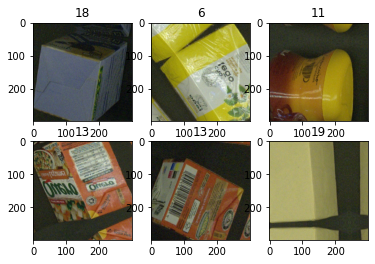

In [27]:
# Getting some samples of the augmented images dataset
dataset = images_dataset_from_tfrecord(os.path.join(build_dir, 'train.tfrecord')).shuffle(200)
plot_augmented_images_dataset_samples(dataset)

# Next, we are going to train the model on the train.ipynb script. See you there